In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#implement a series of machine learning regressors to predict the grade of a student based on EDA information
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold

In [3]:
#read the data
df_final = pd.read_csv('./dataframes/All_Subjects/ML/Processed_EDA_midterm_1_Win_120_Stats.csv', index_col=0)

In [4]:
df_final.head()

,Subject,Grade,Exam,EDA_Tonic_mean,EDA_Phasic_mean,SCR_Amplitude_mean,SCR_RiseTime_mean,SCR_Amplitude_RiseTime_Ratio_mean,EDA_Phasic_std,EDA_Phasic_AUC,SCR_Peaks_sum
0,1,78.0,1.0,0.607029,-0.000486,0.099444,0.618970,0.077134,0.083084,-0.052616,126.0
1,2,82.0,1.0,0.295972,-0.001324,0.039758,0.291433,0.045612,0.057602,-0.159456,47.0
2,3,77.0,1.0,0.390165,-0.000830,0.041607,0.107111,0.048234,0.059900,-0.092366,29.0
3,4,75.0,1.0,0.697027,-0.001120,0.106333,0.454676,0.092329,0.082123,-0.138126,29.0
4,5,67.0,1.0,0.250258,-0.000936,0.082861,0.140079,0.121100,0.053621,-0.109058,42.0


In [5]:
print(f"The min grade is {df_final.Grade.min()}, \n the max is {df_final.Grade.max()}, \n the mean is {df_final.Grade.mean()}, \n and the std is {df_final.Grade.std()}")

The min grade is 64.0, 
 the max is 92.0, 
 the mean is 79.6, 
 and the std is 9.376523445243015


In [6]:
#drop the student ID
df_final = df_final.drop(columns=['Subject'])

#split the data into features and target
X = df_final.drop(columns=['Grade'])
y = df_final['Grade']
#normalize the target
y = y/y.max()

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#use PCA to reduce the number of features
#from sklearn.decomposition import PCA
#pca = PCA(n_components=0.95)
#X_train_scaled = pca.fit_transform(X_train_scaled)
#X_test_scaled = pca.transform(X_test_scaled)

In [7]:
#implement a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

#predict the target
y_pred = lin_reg.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.0030980032107525935
RMSE: 0.055659709043010576
R^2: 0.6639454144268372
AIC: -97.53995001185424


In [401]:
#implement a random forest regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_scaled, y_train)

#predict the target
y_pred = rf_reg.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.002357502953686198
RMSE: 0.04855412396168011
R^2: 0.744270866040819
AIC: -103.0030458113657


In [402]:
#implement a gradient boosting regressor
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train_scaled, y_train)

#predict the target
y_pred = gb_reg.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.0033840710780434157
RMSE: 0.05817276921415565
R^2: 0.6329143237376633
AIC: -95.77351666617598


In [403]:
#implement a support vector regressor
svr = SVR()
svr.fit(X_train_scaled, y_train)

#predict the target
y_pred = svr.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.005387764296111094
RMSE: 0.07340139164968941
R^2: 0.41556455093032185
AIC: -86.47249534945477


In [404]:
#implement a polynomial regression model
poly_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg.fit(X_train_scaled, y_train)

#predict the target
y_pred = poly_reg.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.007761332082838551
RMSE: 0.08809842270346588
R^2: 0.1580927910141231
AIC: -79.17202598718643


In [405]:
from sklearn.linear_model import Ridge

#implement a polynomial regression model with a ridge regularization and grid search
poly_reg = make_pipeline(PolynomialFeatures(), Ridge())
param_grid = {'polynomialfeatures__degree': [1, 2, 3, 4, 5],
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
              'ridge__solver': ['lsqr', 'sparse_cg', 'sag', 'saga'],
              'ridge__max_iter': [100, 1000, 10000]}
grid = GridSearchCV(poly_reg, param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

#predict the target
y_pred = grid.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

grid.best_params_

Mean Squared Error: 0.003267536176273866
RMSE: 0.05716236678334677
R^2: 0.6455553978279196
AIC: -96.47438081964017


{'polynomialfeatures__degree': 1,
 'ridge__alpha': 10,
 'ridge__max_iter': 1000,
 'ridge__solver': 'sag'}

In [406]:
#implement a gradient boosting regressor with grid search
param_grid = {'n_estimators': [100, 200, 300], 
              'max_depth': [3, 4, 5],
              'learning_rate': [0.01, 0.1, 0.5],
              'subsample': [0.8, 0.9, 1.0],
              'max_features': [0.8, 0.9, 1.0]}
gb_reg = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gb_reg, param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

#predict the target
y_pred = grid_search.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.002850305749845609
RMSE: 0.0533882547930311
R^2: 0.6908142915421711
AIC: -99.20658019616306


In [407]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 1.0,
 'n_estimators': 300,
 'subsample': 0.9}

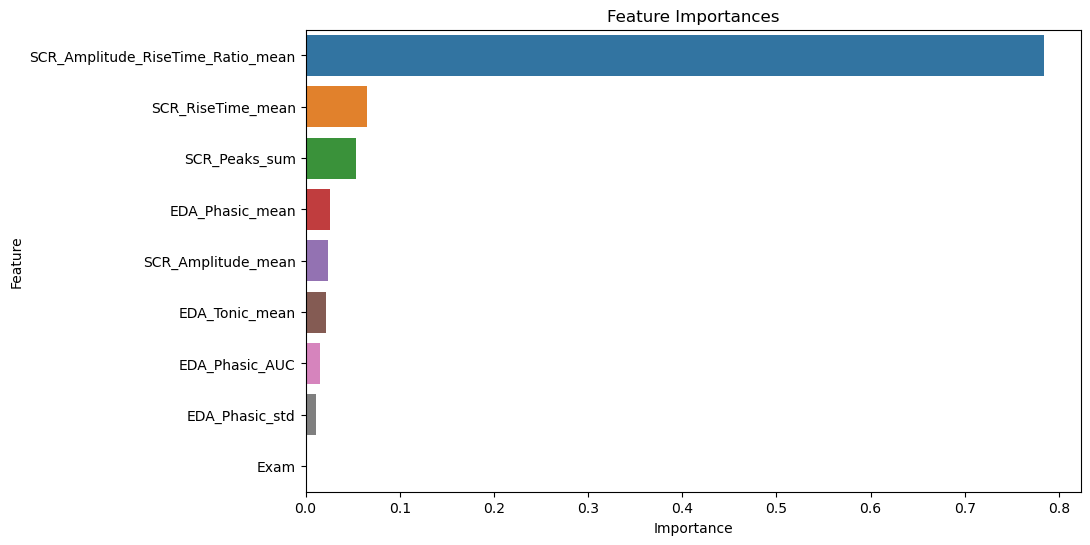

In [408]:
#plot the feature importances
feature_importances = grid_search.best_estimator_.feature_importances_
#get the pca columns
#pca_columns = ['PCA' + str(i) for i in range(1, len(feature_importances) + 1)]
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.show()

In [409]:
#implement a random forest regressor with grid search

param_grid = {'n_estimators': [100, 200, 300],
                'max_features': [None, 'sqrt', 'log2'],
                'max_depth': [3, 4, 5, 10, 20],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],}
rf_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1, verbose=True)
grid_search.fit(X_train_scaled, y_train)

#predict the target
y_pred = grid_search.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

grid_search.best_params_

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Mean Squared Error: 0.002075635305083007
RMSE: 0.04555914074127175
R^2: 0.774846339787606
AIC: -105.54976002071896


{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

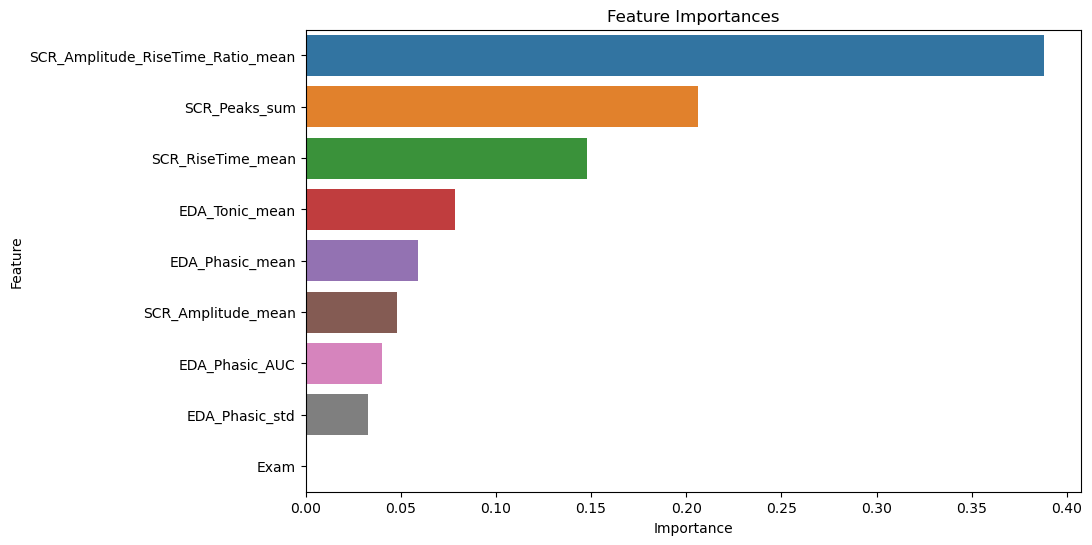

In [410]:
#plot the feature importances
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.show()

In [411]:
#implement a support vector regressor with grid search
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

#predict the target
y_pred = grid_search.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

grid_search.best_params_

Mean Squared Error: 0.003403608656917553
RMSE: 0.05834045471983873
R^2: 0.6307949931479263
AIC: -95.65838081065918


{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

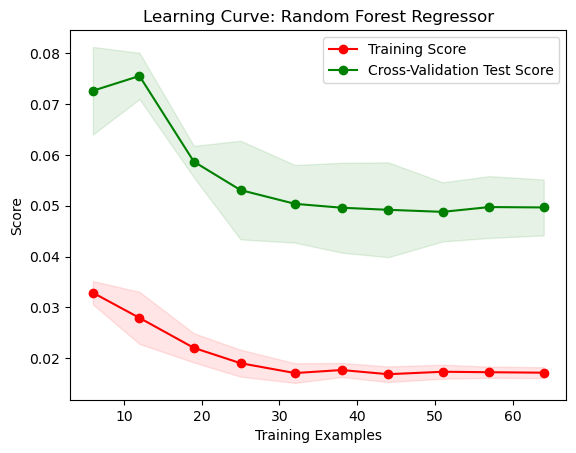

In [412]:
#implement a learning curve for the random forest regressor
train_sizes, train_scores, test_scores = learning_curve(rf_reg, X_train_scaled, y_train, cv=5, scoring='neg_root_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_scores_mean = -1*np.mean(train_scores, axis=1)
train_scores_std = -1*np.std(train_scores, axis=1)
test_scores_mean = -1*np.mean(test_scores, axis=1)
test_scores_std = -1*np.std(test_scores, axis=1)

plt.figure()
plt.title('Learning Curve: Random Forest Regressor')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Test Score')
plt.legend(loc='best')
plt.show()

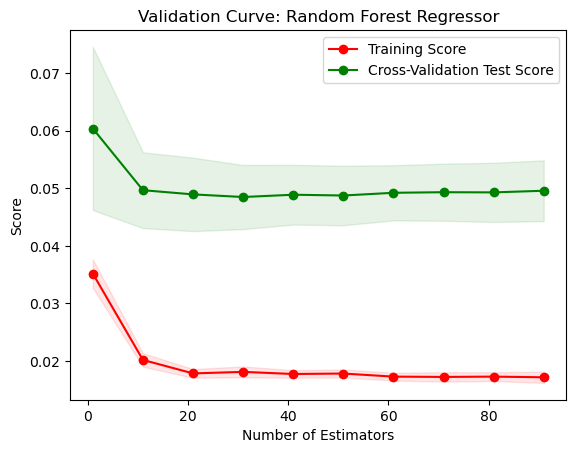

In [413]:
#implement a validation curve for the random forest regressor
param_range = np.arange(1, 100, 10)
train_scores, test_scores = validation_curve(rf_reg, X_train_scaled, y_train, param_name='n_estimators', param_range=param_range, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

train_scores_mean = -1*np.mean(train_scores, axis=1)
train_scores_std = -1*np.std(train_scores, axis=1)
test_scores_mean = -1*np.mean(test_scores, axis=1)
test_scores_std = -1*np.std(test_scores, axis=1)

plt.figure()
plt.title('Validation Curve: Random Forest Regressor')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(param_range, test_scores_mean, 'o-', color='g', label='Cross-Validation Test Score')
plt.legend(loc='best')
plt.show()


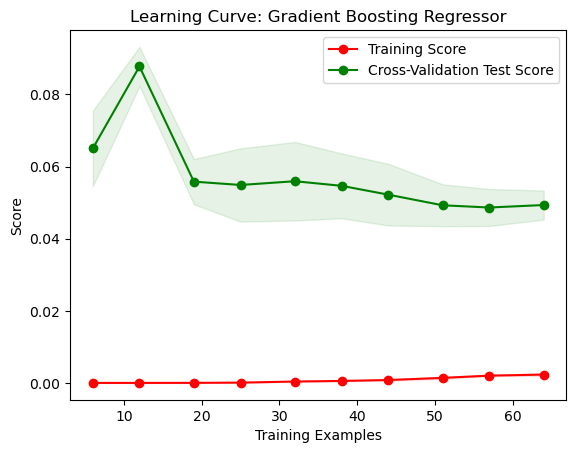

In [414]:
#implement a learning curve for the gradient boosting regressor
train_sizes, train_scores, test_scores = learning_curve(gb_reg, X_train_scaled, y_train, cv=5, scoring='neg_root_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_scores_mean = -1*np.mean(train_scores, axis=1)
train_scores_std = -1*np.std(train_scores, axis=1)
test_scores_mean = -1*np.mean(test_scores, axis=1)
test_scores_std = -1*np.std(test_scores, axis=1)

plt.figure()
plt.title('Learning Curve: Gradient Boosting Regressor')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Test Score')
plt.legend(loc='best')
plt.show()

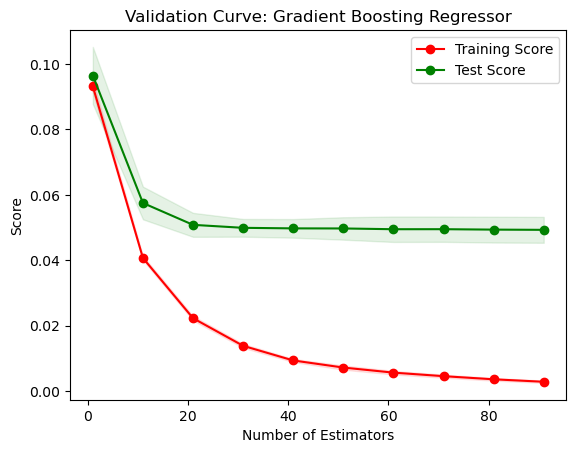

In [415]:
#implement a validation curve for the gradient boosting regressor
param_range = np.arange(1, 100, 10)
train_scores, test_scores = validation_curve(gb_reg, X_train_scaled, y_train, param_name='n_estimators', param_range=param_range, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
train_scores_mean = -1*np.mean(train_scores, axis=1)
train_scores_std = -1*np.std(train_scores, axis=1)
test_scores_mean = -1*np.mean(test_scores, axis=1)
test_scores_std = -1*np.std(test_scores, axis=1)

plt.figure()
plt.title('Validation Curve: Gradient Boosting Regressor')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(param_range, test_scores_mean, 'o-', color='g', label='Test Score')
plt.legend(loc='best')
plt.show()

In [416]:
#implement a multi-layer perceptron regressor
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor(random_state=42, max_iter=100000, hidden_layer_sizes=(128, 128))
mlp_reg.fit(X_train_scaled, y_train)

#predict the target
y_pred = mlp_reg.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.018192917216908338
RMSE: 0.13488112253724885
R^2: -0.9734689862409049
AIC: -62.13445849098895


In [417]:
#implement a multi-layer perceptron regressor with grid search
param_grid = {'hidden_layer_sizes': [(64, 64), (128, 128), (256, 256)],
              'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
mlp_reg = MLPRegressor(random_state=42, max_iter=100000)
grid_search = GridSearchCV(mlp_reg, param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

#predict the target
y_pred = grid_search.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

grid_search.best_params_

Mean Squared Error: 0.0029241216998083584
RMSE: 0.05407514863417722
R^2: 0.6828071376479068
AIC: -98.69522233918488


{'alpha': 1, 'hidden_layer_sizes': (64, 64)}

In [418]:
# implement a voting regressor
from sklearn.ensemble import VotingRegressor
voting_reg = VotingRegressor(estimators=[('rf', rf_reg), ('gb', gb_reg), ('mlp', mlp_reg)])
voting_reg.fit(X_train_scaled, y_train)

#predict the target
y_pred = voting_reg.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.008652592993835482
RMSE: 0.09301931516537564
R^2: 0.06141364134665939
AIC: -76.99792469772709


In [419]:
# implement a stacking regressor
from sklearn.ensemble import StackingRegressor
stacking_reg = StackingRegressor(estimators=[('rf', rf_reg), ('gb', gb_reg)], final_estimator=mlp_reg)
stacking_reg.fit(X_train_scaled, y_train)

#predict the target
y_pred = stacking_reg.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.005252158254072483
RMSE: 0.07247177556864799
R^2: 0.4302743588802729
AIC: -86.98232381683226


Epoch 1/500
3/3 [==============================] - 36s 393ms/step - loss: 0.7994 - val_loss: 0.4828
Epoch 2/500
3/3 [==============================] - 0s 109ms/step - loss: 0.4157 - val_loss: 0.3013
Epoch 3/500
3/3 [==============================] - 0s 41ms/step - loss: 0.2930 - val_loss: 0.4009
Epoch 4/500
3/3 [==============================] - 0s 27ms/step - loss: 0.3594 - val_loss: 0.3996
Epoch 5/500
3/3 [==============================] - 0s 42ms/step - loss: 0.3358 - val_loss: 0.3372
Epoch 6/500
3/3 [==============================] - 0s 94ms/step - loss: 0.2852 - val_loss: 0.2814
Epoch 7/500
3/3 [==============================] - 0s 70ms/step - loss: 0.2560 - val_loss: 0.2611
Epoch 8/500
3/3 [==============================] - 0s 65ms/step - loss: 0.2528 - val_loss: 0.2546
Epoch 9/500
3/3 [==============================] - 0s 67ms/step - loss: 0.2401 - val_loss: 0.2513
Epoch 10/500
3/3 [==============================] - 0s 31ms/step - loss: 0.2225 - val_loss: 0.2629
Epoch 11/500
3/3

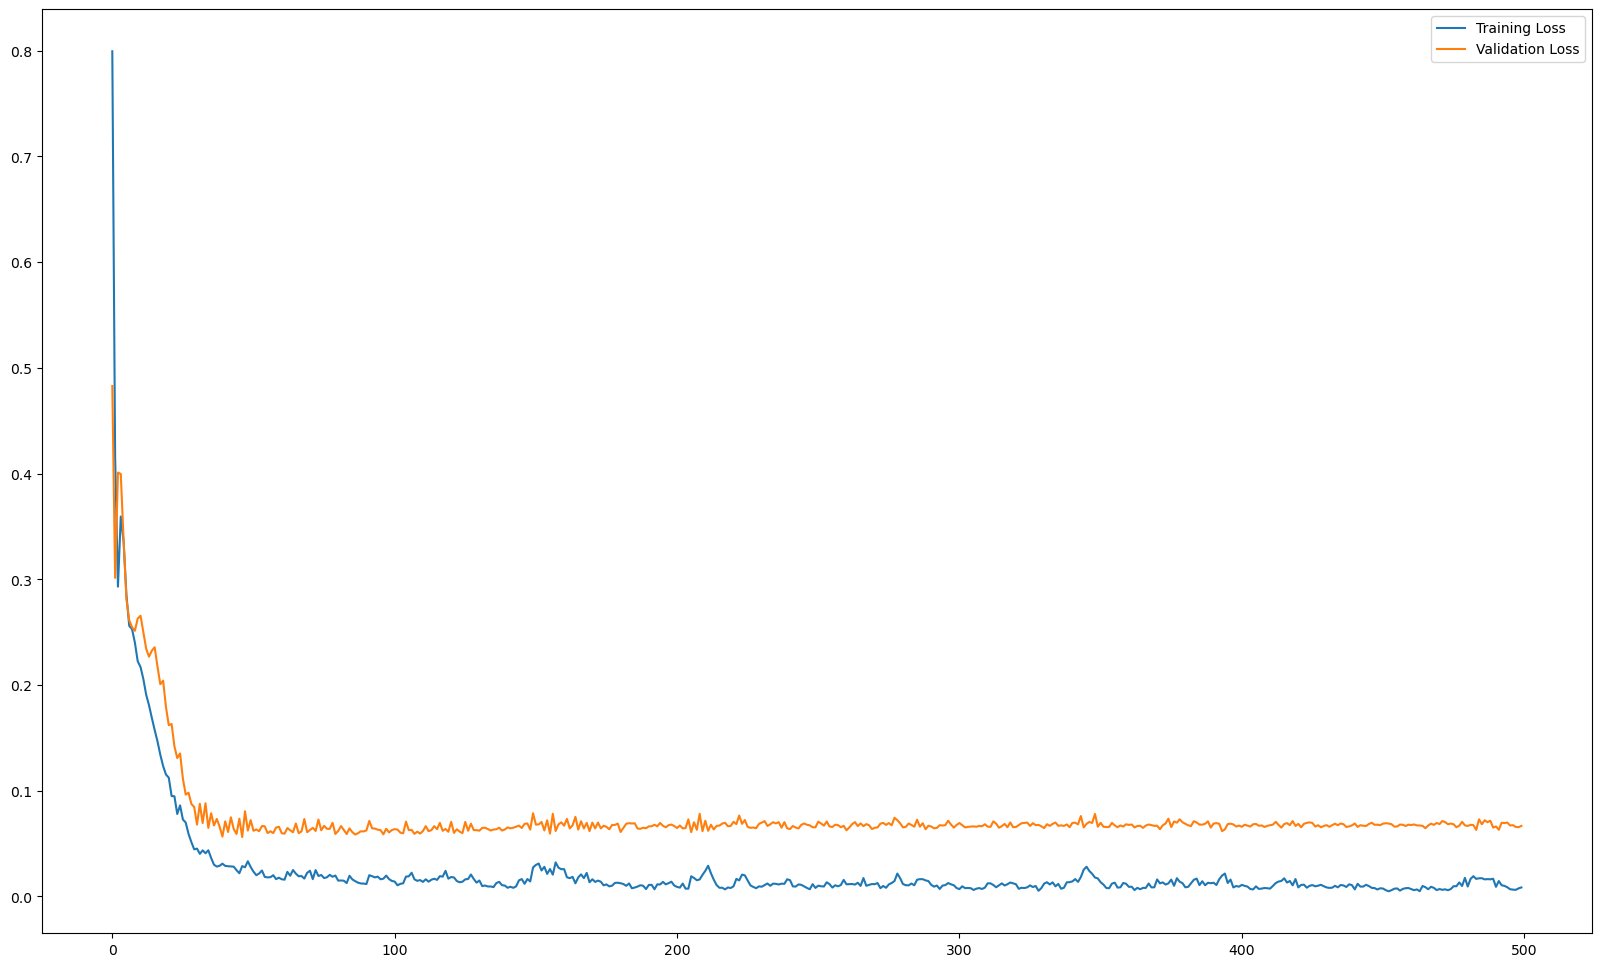

1/1 [==============================] - 0s 251ms/step
Mean Squared Error: 0.0061266166092933646
RMSE: 0.07827270666901308
R^2: 0.3354178593308891
AIC: -83.90225242330439


In [420]:
#implement a CNN regressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model


#reshape the data
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

#implement a CNN regressor
model = keras.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_absolute_error')

#implement early stopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

#implement model checkpoint
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

#fit the model
history = model.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test), epochs=500, batch_size=32, callbacks=[model_checkpoint])

#plot the learning curves
plt.figure(figsize=(20, 12))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

#plot the learning curves with plotly
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines', name='Training Loss'))
fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines', name='Validation Loss'))
fig.update_layout(title='Learning Curves', xaxis_title='Epochs', yaxis_title='Loss')
fig.show()

#load the best model
model = load_model('best_model.h5')

#predict the target
y_pred = model.predict(X_test_reshaped)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Epoch 1/500
3/3 [==============================] - 3s 493ms/step - loss: 0.9632 - val_loss: 0.9401
Epoch 2/500
3/3 [==============================] - 0s 52ms/step - loss: 0.8565 - val_loss: 0.8315
Epoch 3/500
3/3 [==============================] - 0s 58ms/step - loss: 0.7476 - val_loss: 0.7134
Epoch 4/500
3/3 [==============================] - 0s 58ms/step - loss: 0.6298 - val_loss: 0.5777
Epoch 5/500
3/3 [==============================] - 0s 61ms/step - loss: 0.5085 - val_loss: 0.4349
Epoch 6/500
3/3 [==============================] - 0s 70ms/step - loss: 0.4081 - val_loss: 0.3585
Epoch 7/500
3/3 [==============================] - 0s 59ms/step - loss: 0.3364 - val_loss: 0.3395
Epoch 8/500
3/3 [==============================] - 0s 35ms/step - loss: 0.3111 - val_loss: 0.3483
Epoch 9/500
3/3 [==============================] - 0s 71ms/step - loss: 0.3235 - val_loss: 0.3163
Epoch 10/500
3/3 [==============================] - 0s 44ms/step - loss: 0.2892 - val_loss: 0.2799
Epoch 11/500
3/3 [

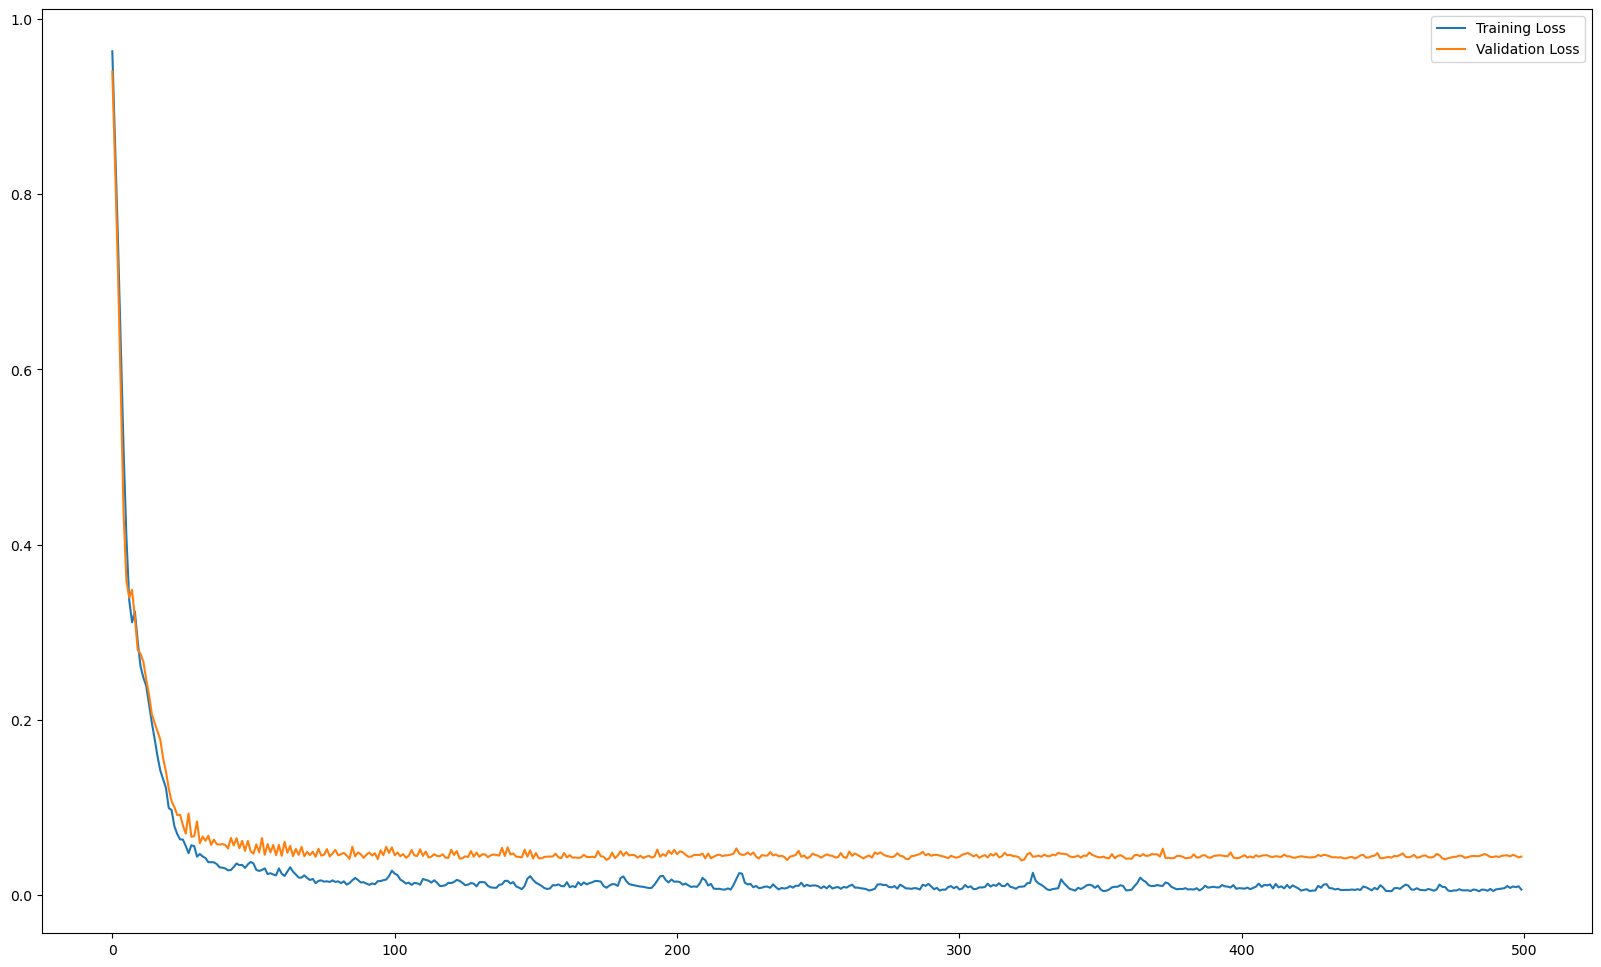

1/1 [==============================] - 0s 255ms/step
Mean Squared Error: 0.0034964261964323617
RMSE: 0.05913058596388473
R^2: 0.6207266498785233
AIC: -95.12027837769158


In [421]:
#implement a RNN regressor
model = keras.Sequential([
    layers.SimpleRNN(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_absolute_error')

#implement model checkpoint
model_checkpoint = ModelCheckpoint('best_model_rnn.h5', monitor='val_loss', mode='min', save_best_only=True)

#fit the model
history = model.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test), epochs=500, batch_size=32, callbacks=[model_checkpoint])

#plot the learning curves
plt.figure(figsize=(20, 12))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

#plot the learning curves with plotly
fig = go.Figure()
fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines', name='Training Loss'))
fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines', name='Validation Loss'))
fig.update_layout(title='Learning Curves', xaxis_title='Epochs', yaxis_title='Loss')
fig.show()

#load the best model
model = load_model('best_model_rnn.h5')

#predict the target
y_pred = model.predict(X_test_reshaped)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Epoch 1/500
3/3 [==============================] - 3s 269ms/step - loss: 0.8841 - val_loss: 0.8346
Epoch 2/500
3/3 [==============================] - 0s 59ms/step - loss: 0.8324 - val_loss: 0.7864
Epoch 3/500
3/3 [==============================] - 0s 51ms/step - loss: 0.7794 - val_loss: 0.7335
Epoch 4/500
3/3 [==============================] - 1s 252ms/step - loss: 0.7196 - val_loss: 0.6736
Epoch 5/500
3/3 [==============================] - 0s 107ms/step - loss: 0.6518 - val_loss: 0.6029
Epoch 6/500
3/3 [==============================] - 0s 79ms/step - loss: 0.5722 - val_loss: 0.5155
Epoch 7/500
3/3 [==============================] - 0s 65ms/step - loss: 0.4731 - val_loss: 0.4090
Epoch 8/500
3/3 [==============================] - 0s 58ms/step - loss: 0.3593 - val_loss: 0.2850
Epoch 9/500
3/3 [==============================] - 0s 90ms/step - loss: 0.2670 - val_loss: 0.2069
Epoch 10/500
3/3 [==============================] - 0s 46ms/step - loss: 0.2415 - val_loss: 0.2073
Epoch 11/500
3/3

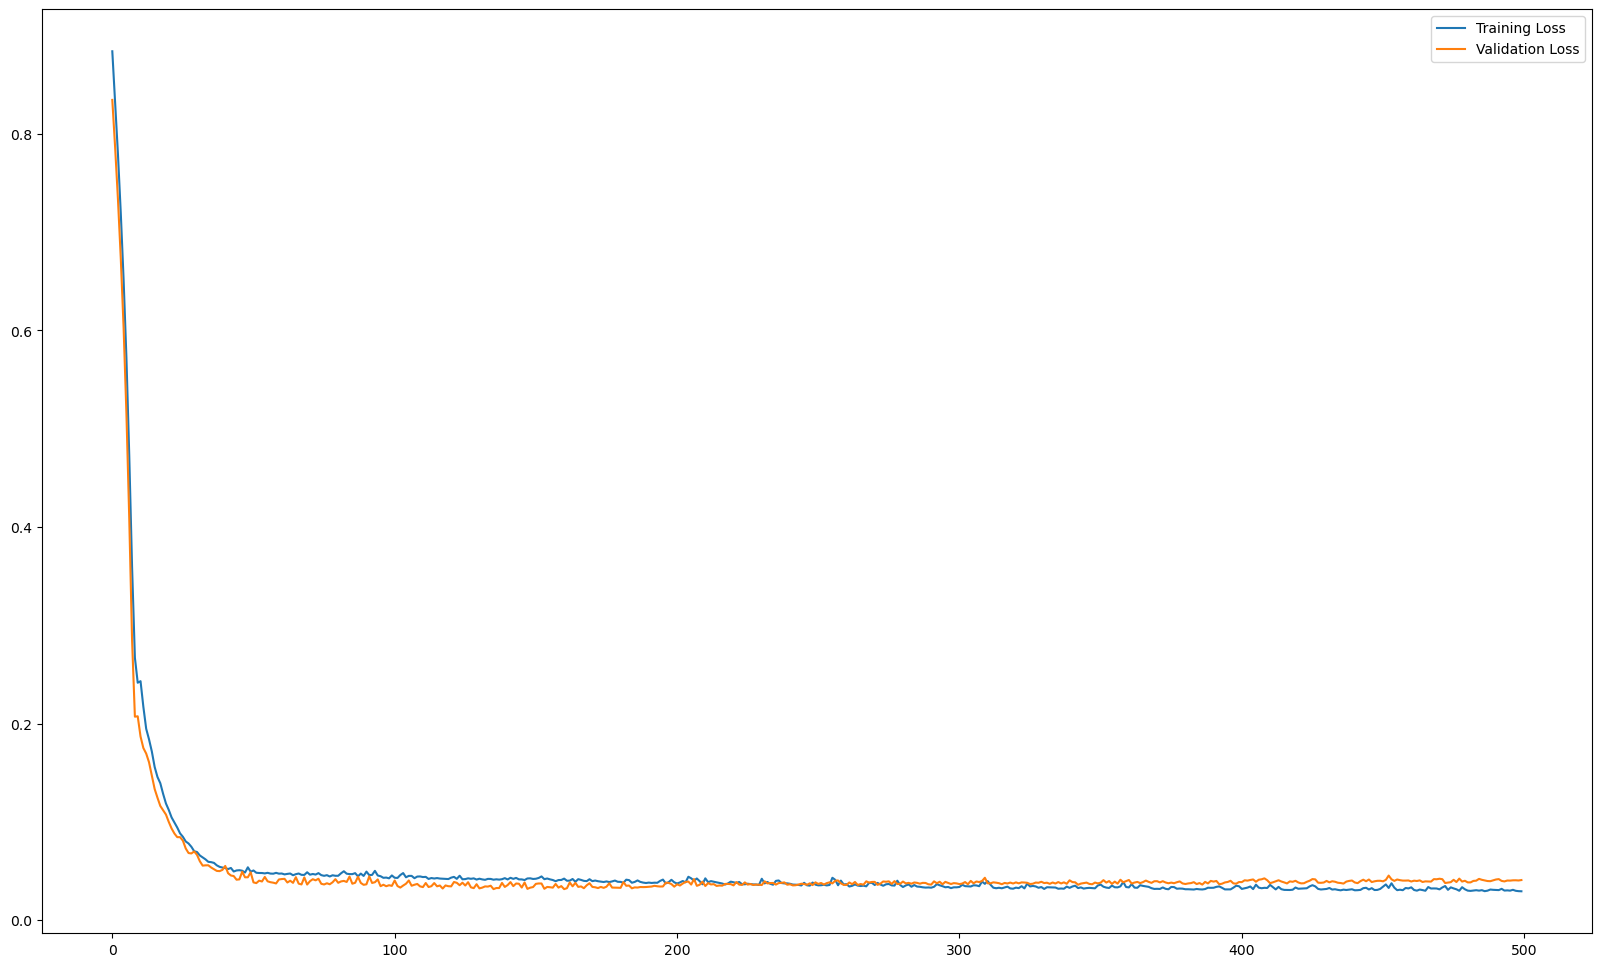

1/1 [==============================] - 1s 508ms/step
Mean Squared Error: 0.0022950458232677295
RMSE: 0.04790663652634914
R^2: 0.7510458767980768
AIC: -103.54004938206997


In [422]:
#implement a LSTM regressor
model = keras.Sequential([
    layers.LSTM(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_absolute_error')

#implement model checkpoint
model_checkpoint = ModelCheckpoint('best_model_lstm.h5', monitor='val_loss', mode='min', save_best_only=True)

#fit the model
history = model.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test), epochs=500, batch_size=32, callbacks=[model_checkpoint])

#plot the learning curves
plt.figure(figsize=(20, 12))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

#plot the learning curves with plotly
fig = go.Figure()
fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines', name='Training Loss'))
fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines', name='Validation Loss'))
fig.update_layout(title='Learning Curves', xaxis_title='Epochs', yaxis_title='Loss')
fig.show()

#load the best model
model = load_model('best_model_lstm.h5')

#predict the target
y_pred = model.predict(X_test_reshaped)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)